In [111]:
import numpy as np
import pandas as pd
import tsfel

from matplotlib import pyplot as plt
import seaborn as sbn
import seaborn as sbn

import umap
from sklearn.preprocessing import StandardScaler

# Time Series Feature Extraction

documentation: https://tsfel.readthedocs.io/en/latest/  

paper: https://www.sciencedirect.com/science/article/pii/S2352711020300017

In [156]:
clover = pd.read_csv('../data/output_abs_sb_mscarlet/output_abs_sb_mscarlet/clover/clover_all_cell.csv')
time = list(clover.columns[1:-3])
clo_ren = {x:f'clo_{x}' for x in clover.columns[1:-3]}
clover = clover.rename(clo_ren, axis=1)
clo_sel = [x for x in clover.columns[1:-3]]
mscarlet = pd.read_csv('../data/output_abs_sb_mscarlet/output_abs_sb_mscarlet/mscarlet/mscarlet_all_cell.csv')
msc_ren = {x:f'msc_{x}' for x in mscarlet.columns[1:-3]}
mscarlet = mscarlet.rename(msc_ren, axis=1)
msc_sel = [x for x in mscarlet.columns[1:-3]]
dat = clover.merge(mscarlet, on=['track_index', 'cell__treatment'])
dat.head()

,track_index,clo_0.0,clo_0.2,clo_0.5,clo_0.8,clo_1.0,clo_1.2,clo_1.5,clo_1.8,clo_2.0,...,msc_19.8,msc_20.0,msc_20.2,msc_20.5,msc_20.8,msc_21.0,msc_21.2,msc_21.5,site_y,median_y
0,5_1000022195_heya8_cdk2_mdmx__untreated,0.155885,0.161039,0.154921,0.155860,0.104046,0.100504,0.070314,0.056613,0.102267,...,0.725810,0.747852,0.685786,0.736157,0.706905,0.708613,0.675603,0.607260,5,0.611356
1,86_1000214349_heya8_cdk2_mdmx__untreated,0.688822,0.682840,0.683975,0.573425,0.539346,0.437008,0.366279,0.327197,0.192908,...,0.653581,0.869607,0.676076,0.654738,0.649322,0.815396,0.729968,0.692926,86,0.579295
2,2_1000008156_heya8_cdk2_mdmx__untreated,0.221258,0.321133,0.343385,0.367101,0.410391,0.514663,0.551495,0.649356,0.762877,...,0.193381,0.194631,0.280427,0.172175,0.080358,0.306924,0.318046,0.193690,2,0.385374
3,79_1000179546_heya8_cdk2_mdmx__untreated,0.616528,0.649111,0.709588,0.725635,0.781404,0.805625,0.769464,0.801717,0.781286,...,0.153205,0.134019,0.234945,0.015158,0.173044,0.150206,0.106442,0.104672,79,0.318933
4,2_1000007033_heya8_cdk2_mdmx__untreated,0.727552,0.677675,0.564581,0.701329,0.794484,0.754134,0.708484,0.740395,0.758439,...,0.238812,0.236626,0.296743,0.280049,0.272331,0.331154,0.244888,0.336616,2,0.313539


In [153]:
# needs to be column delineated 
# time-id  feature 
obs = []
for i, row in dat.iterrows(): 
    obs.append(pd.DataFrame({'clover':row[clo_sel].values, 'mscarlet':row[msc_sel].values, 'time(h)':time}))

In [154]:
# Retrieves a pre-defined feature configuration file to extract all available features
cfg = tsfel.get_features_by_domain()

# Extract features
X = []
for i,o in enumerate(obs): 
    print(f'progress: {i}/{len(obs)}', end='\r')
    X.append(tsfel.time_series_features_extractor(cfg, o, verbose=False))

<ipython-input-154-2ea78b5b4ad2>:8: UserWarning: Using default sampling frequency set in configuration file.
  X.append(tsfel.time_series_features_extractor(cfg, o, verbose=False))


In [157]:
res = pd.concat(X, axis=0).reset_index(drop=True)
res = res.assign(track_index=dat.track_index, cell__treatment=dat.cell__treatment)
res.head()

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF Slope,0_ECDF_0,...,2_Wavelet variance_2,2_Wavelet variance_3,2_Wavelet variance_4,2_Wavelet variance_5,2_Wavelet variance_6,2_Wavelet variance_7,2_Wavelet variance_8,2_Zero crossing rate,track_index,cell__treatment
0,25.816584,0.392628,25.816584,0.654246,17.0,69.0,0.155860,0.806383,0.511742,0.011494,...,16.485781,29.27313,45.881855,66.427671,91.049627,119.90985,152.419043,1.0,5_1000022195_heya8_cdk2_mdmx__untreated,heya8_cdk2_mdmx__untreated
1,28.341121,0.455549,28.341121,0.482946,17.0,69.0,0.335008,0.696854,1.728562,0.011494,...,16.485781,29.27313,45.881855,66.427671,91.049627,119.90985,152.419043,1.0,86_1000214349_heya8_cdk2_mdmx__untreated,heya8_cdk2_mdmx__untreated
2,22.827340,0.349093,22.827340,0.457613,17.0,69.0,0.085102,0.758498,0.728836,0.011494,...,16.485781,29.27313,45.881855,66.427671,91.049627,119.90985,152.419043,1.0,2_1000008156_heya8_cdk2_mdmx__untreated,heya8_cdk2_mdmx__untreated
3,43.278603,0.568753,43.278603,0.333229,17.0,69.0,0.402255,0.870827,1.836705,0.011494,...,16.485781,29.27313,45.881855,66.427671,91.049627,119.90985,152.419043,1.0,79_1000179546_heya8_cdk2_mdmx__untreated,heya8_cdk2_mdmx__untreated
4,51.685998,0.645738,51.685998,0.373971,17.0,69.0,0.624464,0.894587,2.957980,0.011494,...,16.485781,29.27313,45.881855,66.427671,91.049627,119.90985,152.419043,1.0,2_1000007033_heya8_cdk2_mdmx__untreated,heya8_cdk2_mdmx__untreated


In [158]:
res.shape

(395, 536)

In [161]:
res = res[res.columns[(np.std(res[res.columns[:-2]], axis=0) > 0.1).values.tolist() + [True, True]]]

In [162]:
res.shape

(395, 167)

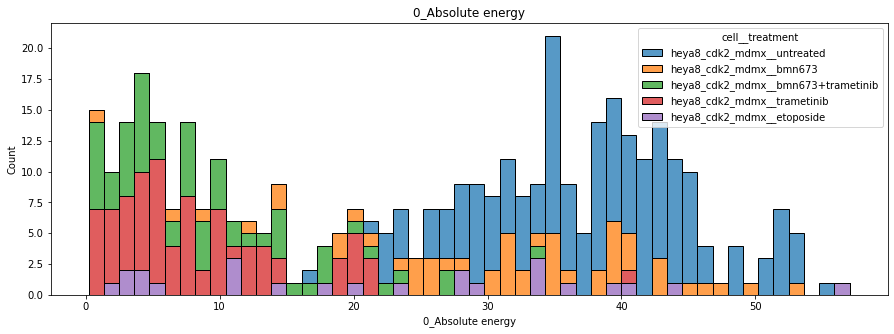

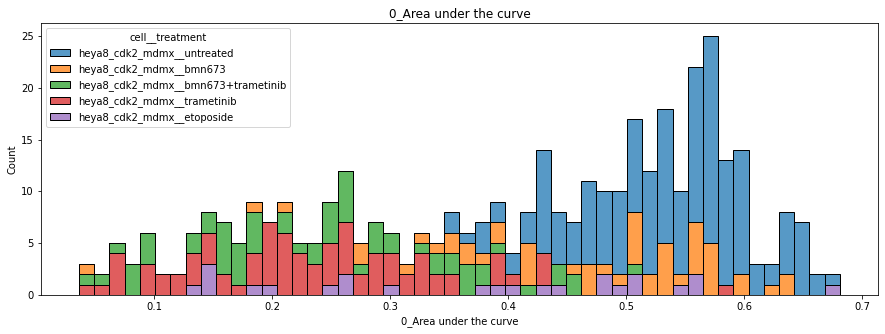

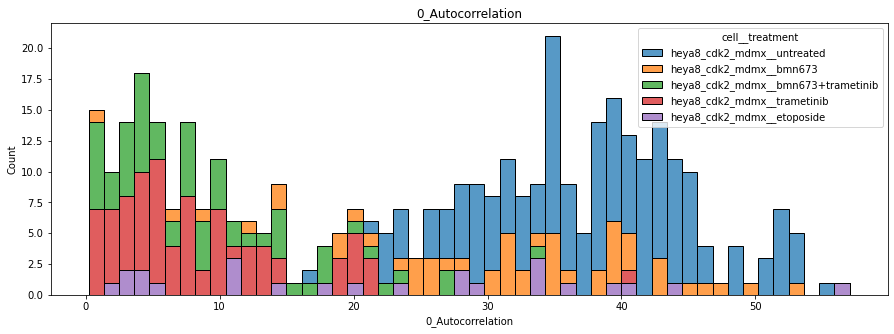

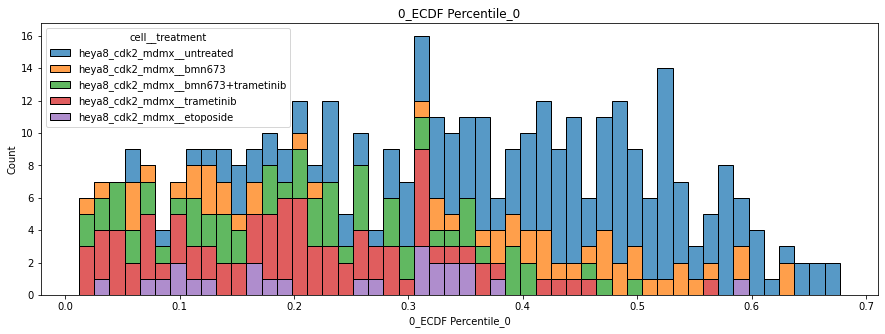

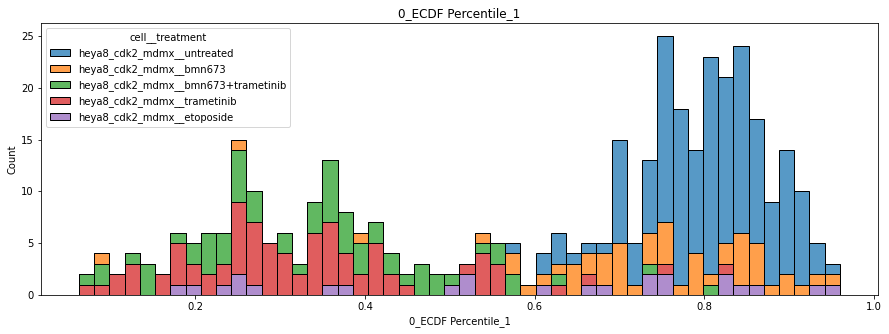

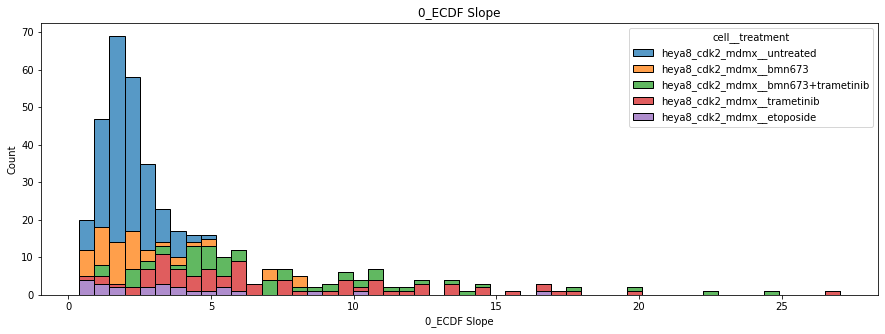

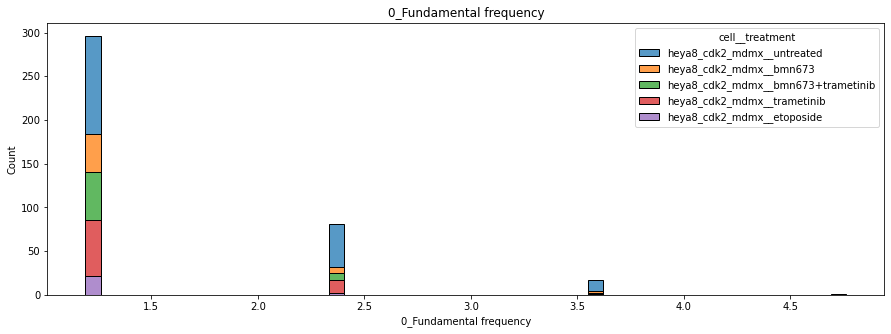

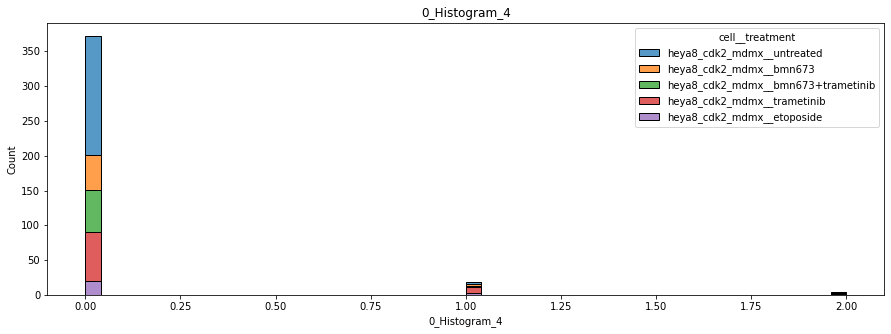

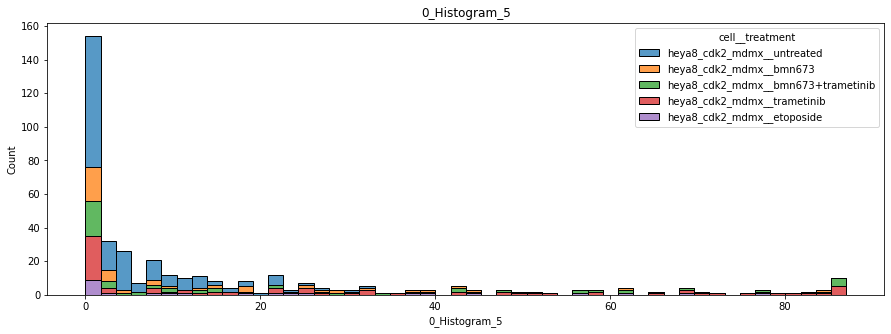

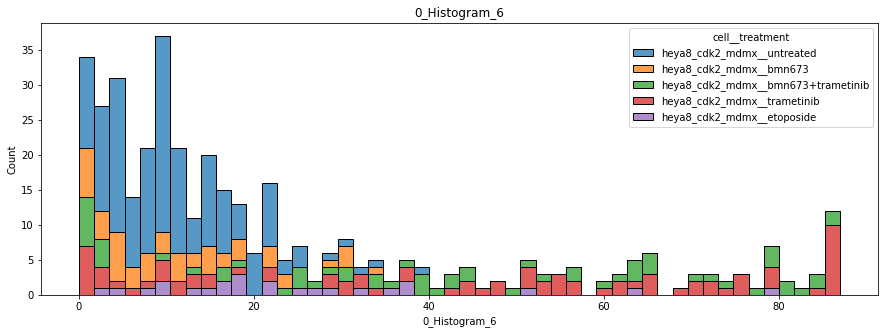

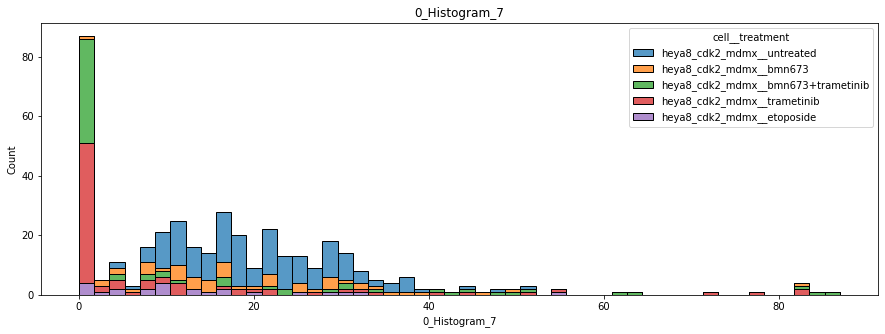

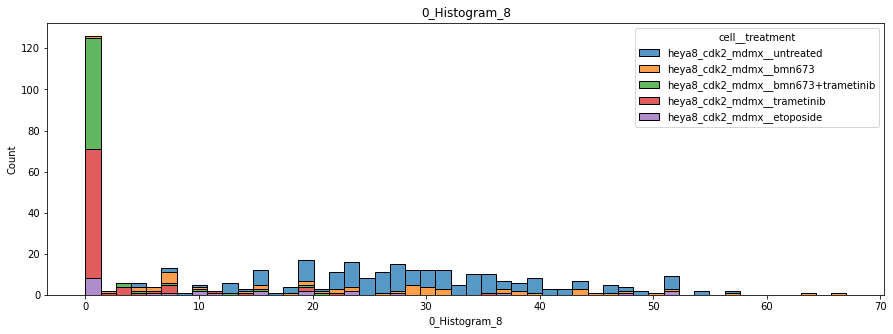

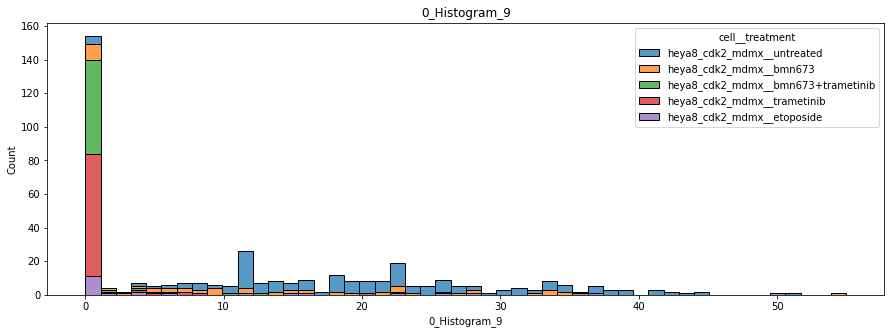

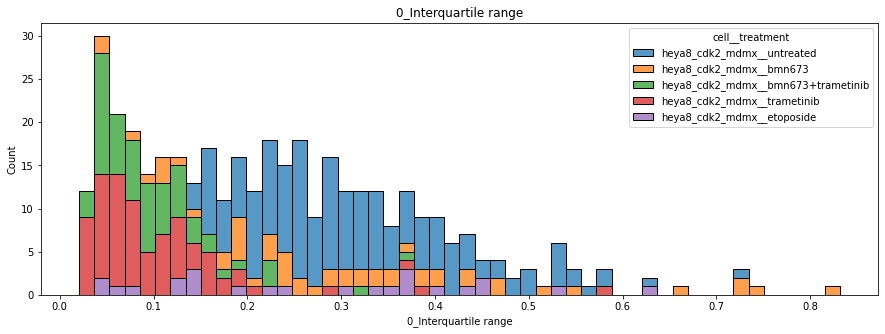

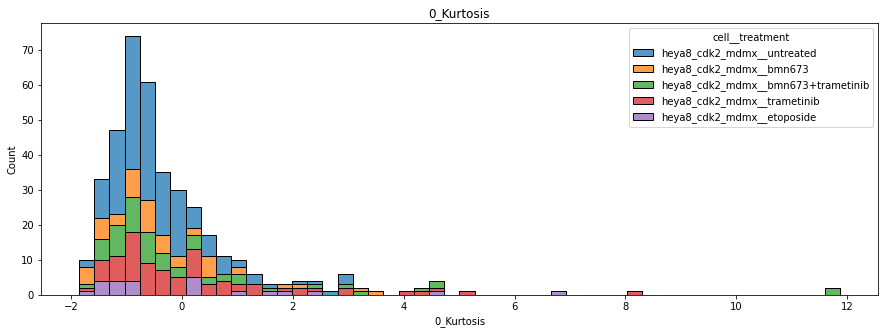

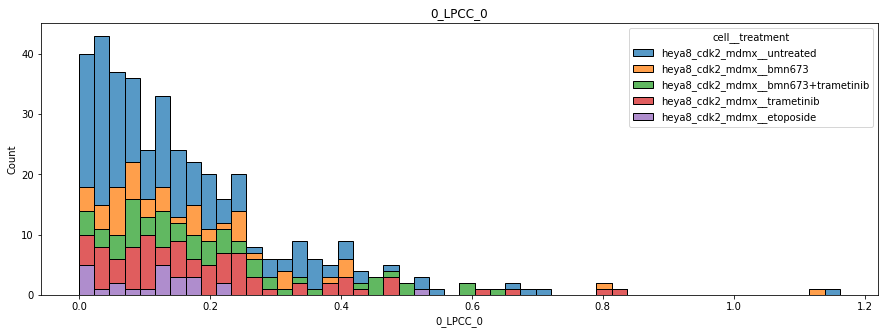

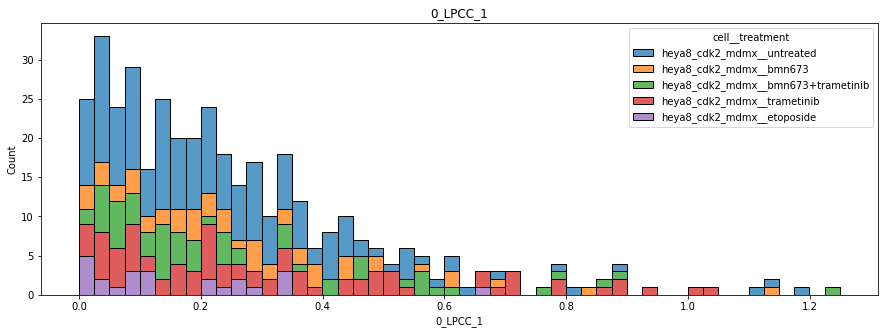

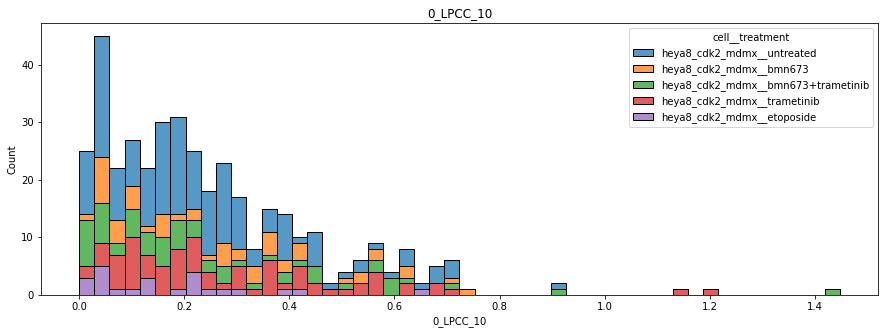

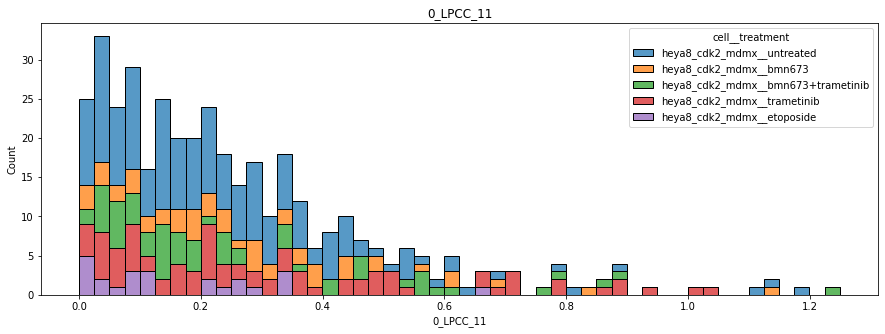

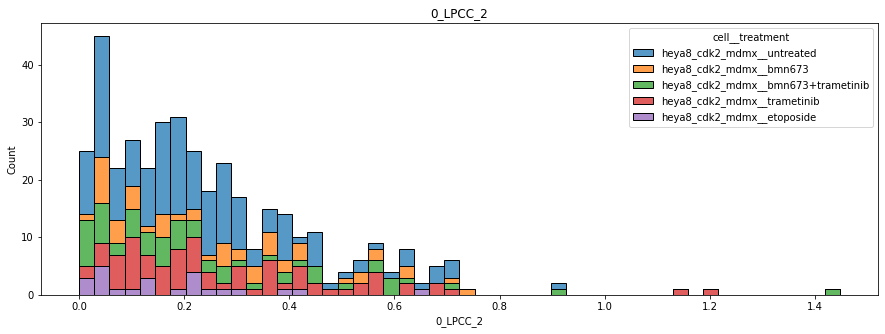

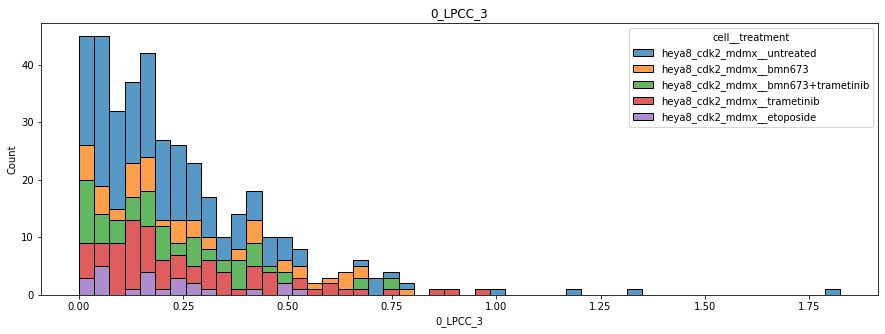

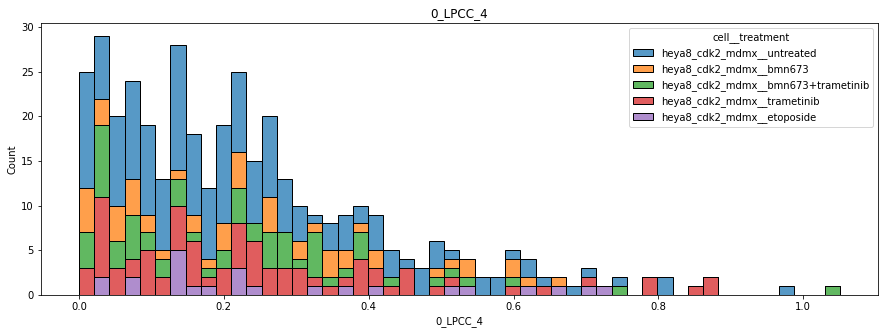

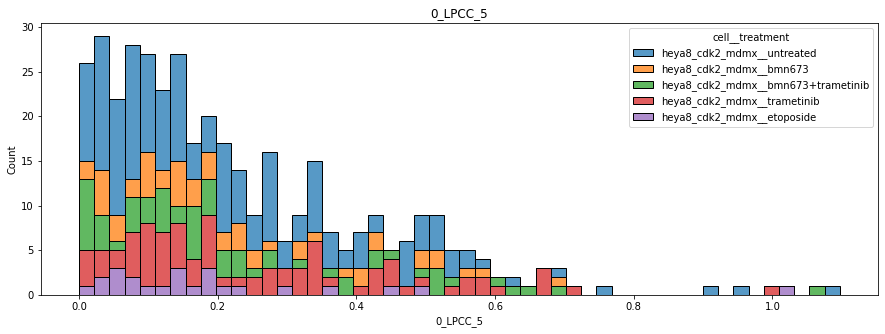

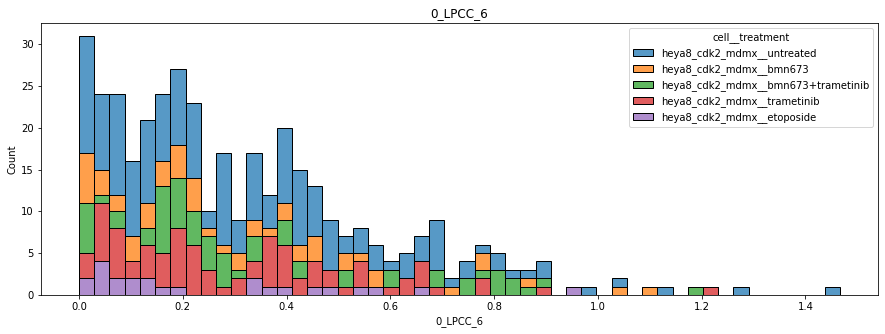

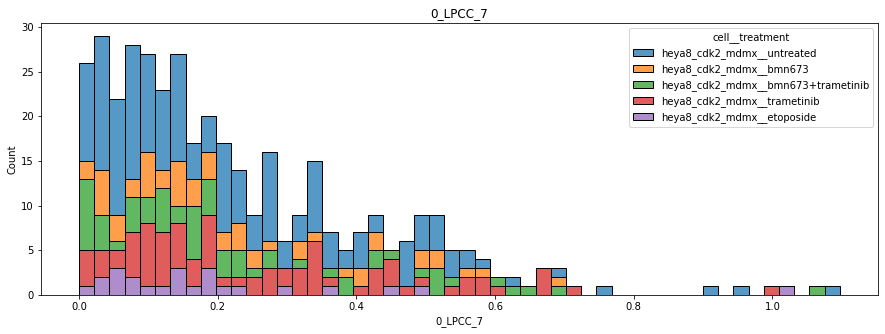

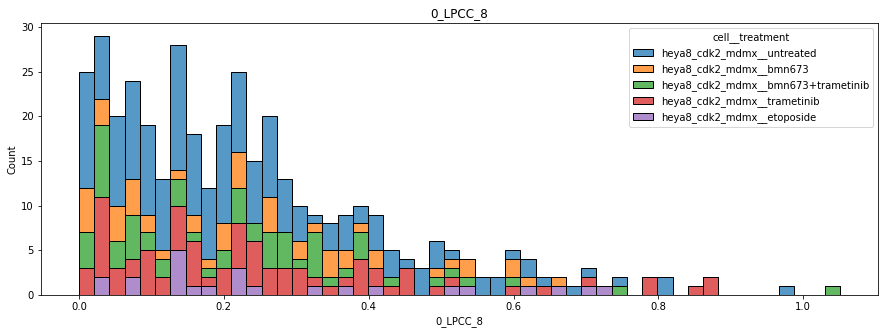

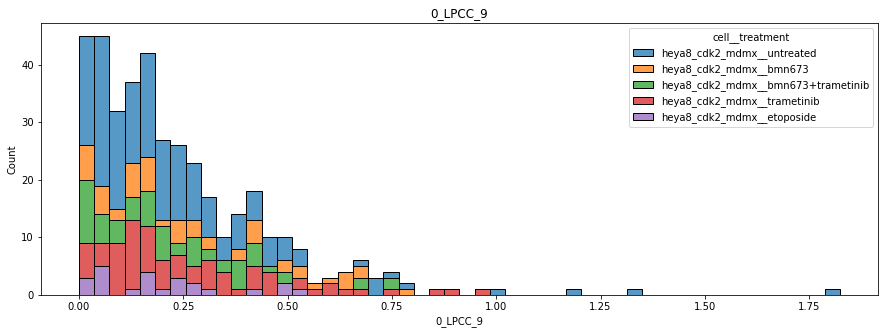

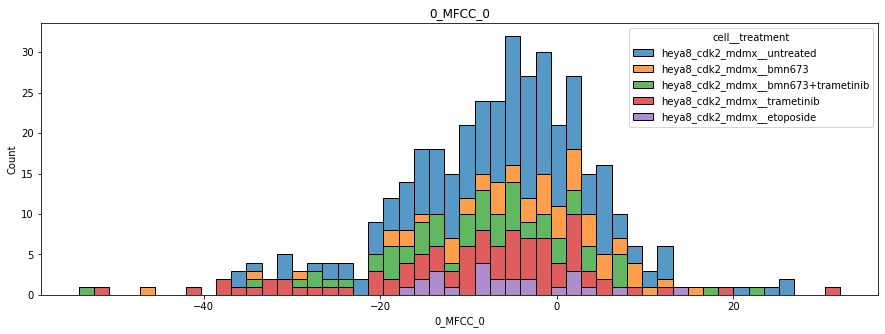

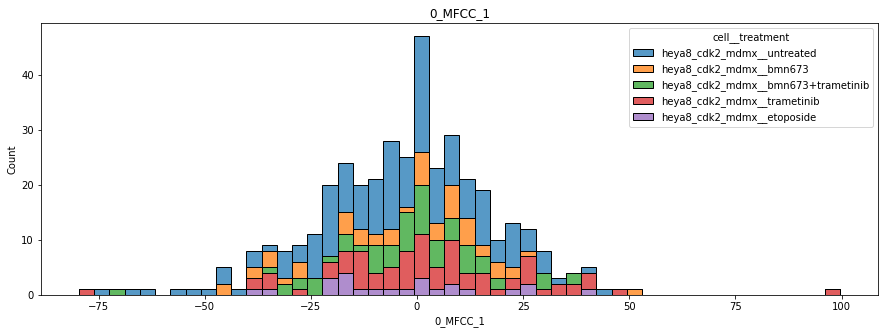

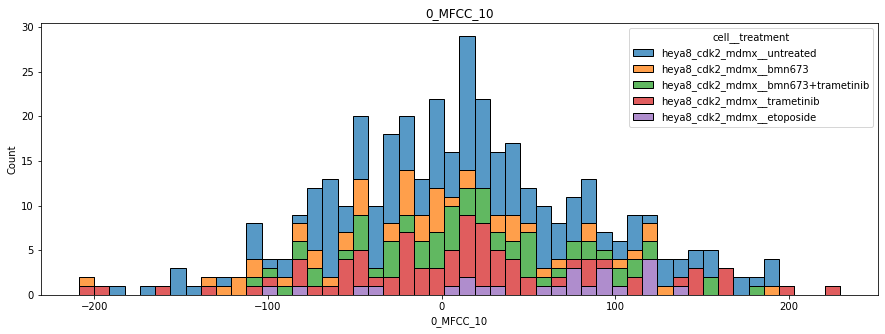

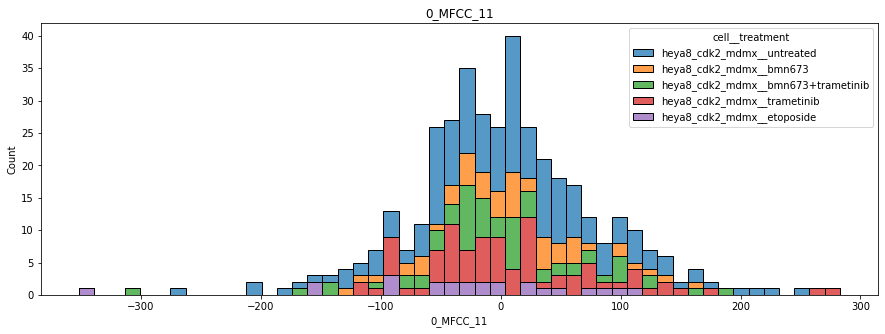

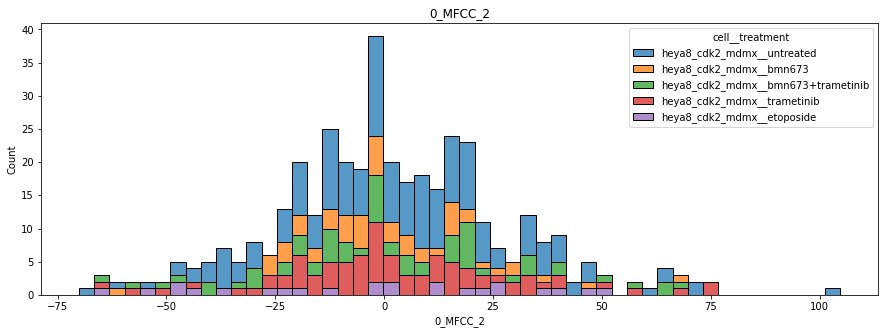

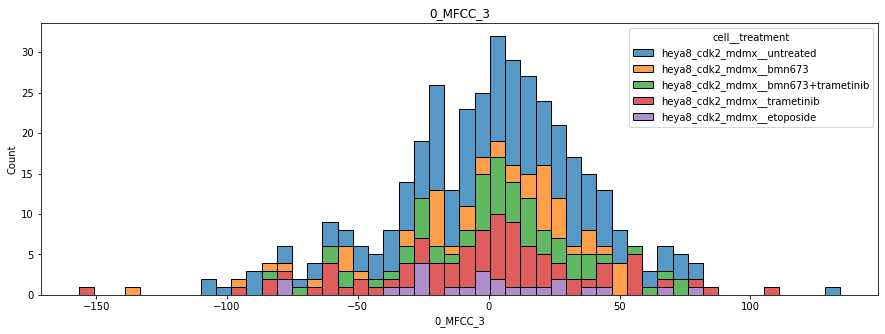

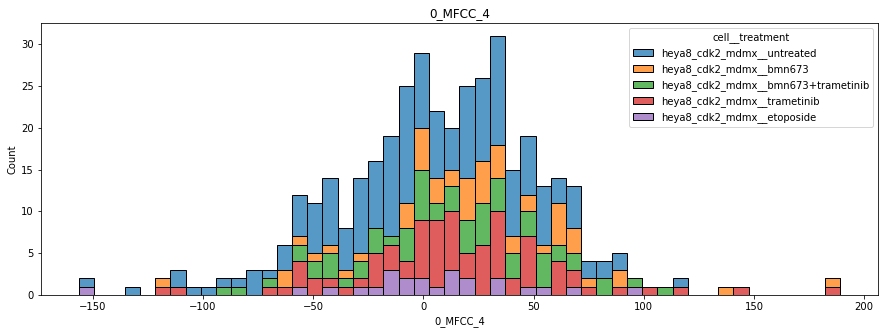

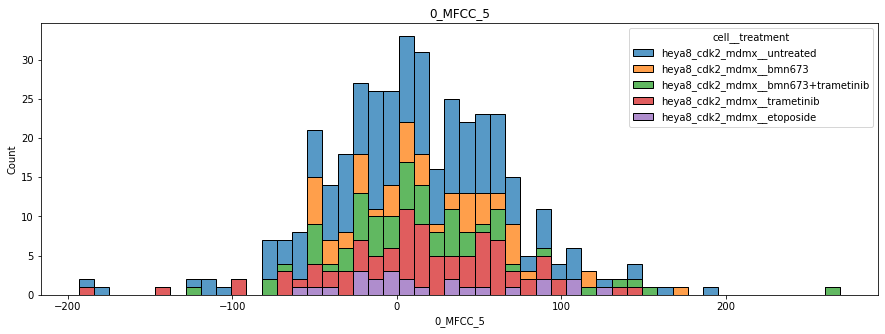

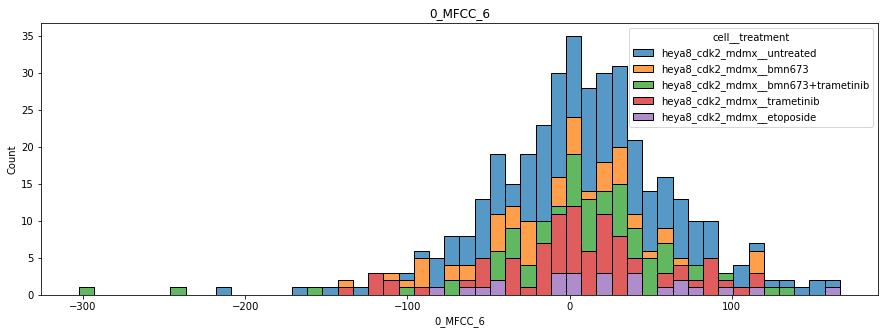

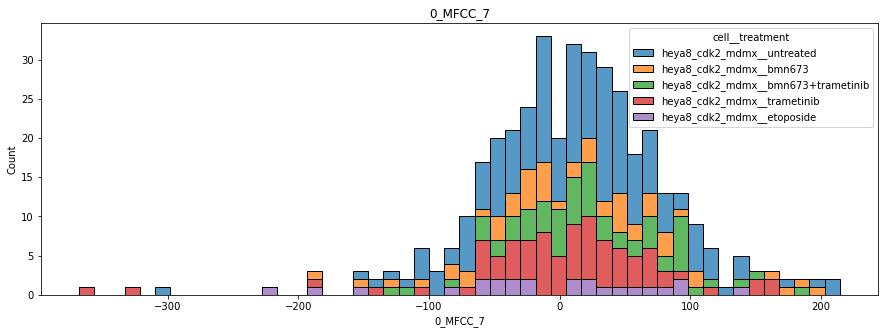

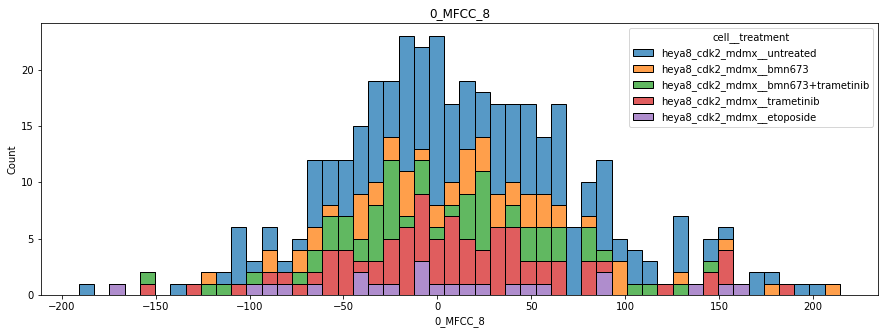

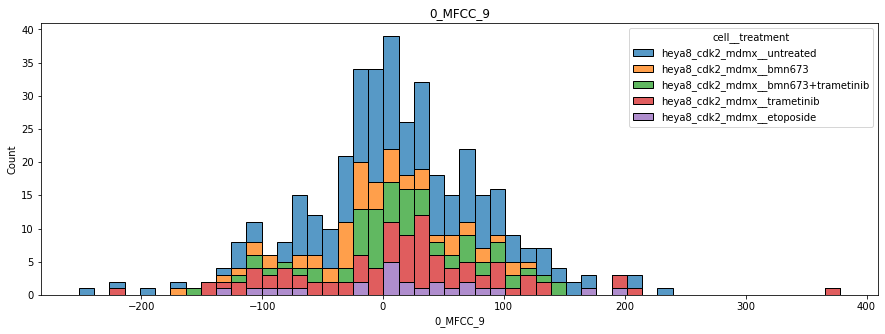

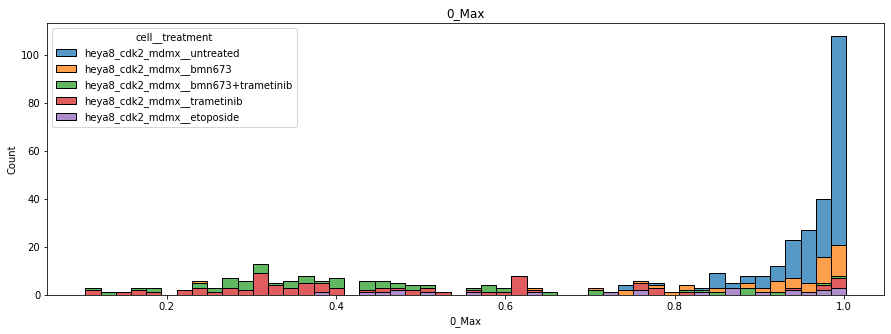

KeyboardInterrupt: 

In [163]:
for feat in res.columns[:-2]: 
    plt.figure(figsize= (15,5))
    sbn.histplot(x=feat,kde=False, bins=50, hue='cell__treatment',multiple='stack', data=res)
    plt.title(feat)
    plt.show()

# umap on features 

In [164]:
scaled_res = StandardScaler().fit_transform(res[res.columns[:-2]].values)

In [165]:
reducer =  fit = umap.UMAP(n_neighbors=15, min_dist=0.05, n_components=2, metric='euclidean')

In [166]:
embedding = reducer.fit_transform(scaled_res)
embedding.shape

(395, 2)

In [167]:
umap_res = pd.DataFrame(embedding).rename({0:'x1', 1:'x2'}, axis=1).assign(cell__treatment=res.cell__treatment)

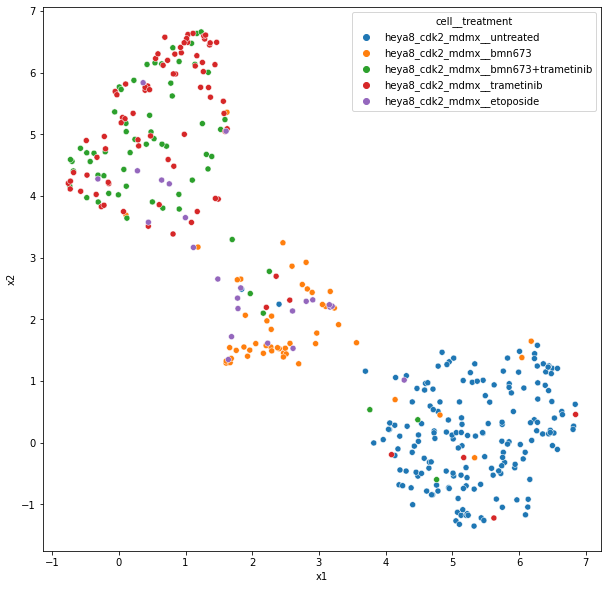

In [168]:
plt.figure(figsize=(10,10))
sbn.scatterplot(x='x1', y='x2', hue='cell__treatment', data=umap_res)
plt.show()